In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, Column, vstack, join

import palettable

cmap_1 = palettable.colorbrewer.sequential.Blues_7_r
cmap_2 = palettable.colorbrewer.sequential.OrRd_7_r
cmap_3 = palettable.colorbrewer.sequential.YlGn_7_r
cmap_4 = palettable.colorbrewer.sequential.Purples_7_r

cmap_list = [cmap_1, cmap_2, cmap_3, cmap_4]

color_bins = ["#377eb8", "#e41a1c", "#1b9e77", "#984ea3"]

In [2]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog

In [3]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### Scatter trends for different halo mass proxies

- Test different galaxy size measurements.
- Test different large aperture stellar mass defined by R50
- Test different outskirt stellar mass defined by R50

In [4]:
topn_massive = pickle.load(
    open(os.path.join(res_dir, 'topn_galaxies_sum.pkl'), 'rb'))

In [23]:
cmod_bins = topn_massive['logm_cmod']
m100_bins = topn_massive['logm_100']
mout_bins = topn_massive['logm_50_100']

# Different sizes
r50_bins = topn_massive['r50_100']
r80_bins = topn_massive['r80_100']
r90_bins = topn_massive['r90_100']

# Stellar mass out to different times of Re
m_1_r50_bins = topn_massive['logm_r50']
m_2_r50_bins = topn_massive['logm_2_r50']
m_4_r50_bins = topn_massive['logm_4_r50']
m_6_r50_bins = topn_massive['logm_6_r50']

m_2_4_r50_bins = topn_massive['logm_2_4_r50']
m_2_6_r50_bins = topn_massive['logm_2_6_r50']
m_3_5_r50_bins = topn_massive['logm_3_5_r50']
m_4_6_r50_bins = topn_massive['logm_4_6_r50']

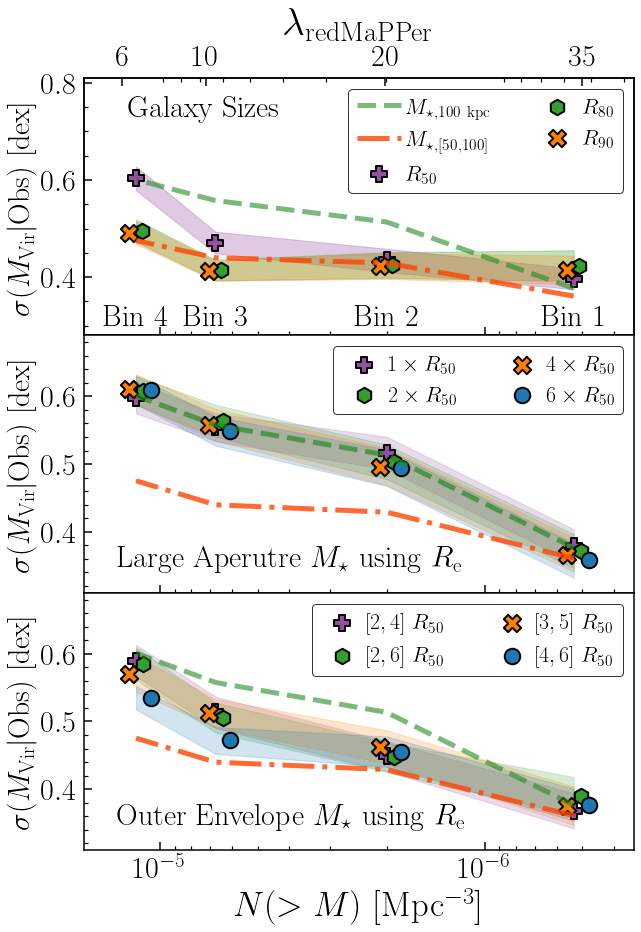

In [27]:
fig = plt.figure(figsize=(9., 13.0))
fig.subplots_adjust(left=0.13, right=0.98, bottom=0.085, top=0.91,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(311)

ax1.set_xscale("log", nonpositive='clip')
ax1.grid(False)

colors = ['#984ea3', '#33a02c', '#ff7f00', '#1f78b4', '#e41a1c']

ax1.fill_between(
    m100_bins['rho_bin'], r50_bins['sig_med_bt'] - r50_bins['sig_err_bt'],
    r50_bins['sig_med_bt'] + r50_bins['sig_err_bt'], 
    color=colors[0], alpha=0.3
)

ax1.fill_between(
    m100_bins['rho_bin'], r80_bins['sig_med_bt'] - r80_bins['sig_err_bt'],
    r80_bins['sig_med_bt'] + r80_bins['sig_err_bt'], 
    color=colors[1], alpha=0.3
)

ax1.fill_between(
    m100_bins['rho_bin'], r90_bins['sig_med_bt'] - r90_bins['sig_err_bt'],
    r90_bins['sig_med_bt'] + r90_bins['sig_err_bt'], 
    color=colors[2], alpha=0.25
)

ax1.scatter(m100_bins['rho_bin'], r50_bins['sig_med_bt'], 
            s=250, marker='P', alpha=1.0, facecolor=colors[0], edgecolor='k', 
            linewidth=2.0, label=r'$R_{50}$')

ax1.scatter(m100_bins['rho_bin'] * 0.96, r80_bins['sig_med_bt'], 
            s=240, marker='h', alpha=1.0, facecolor=colors[1], edgecolor='k', 
            linewidth=2.0, label=r'$R_{80}$')

ax1.scatter(m100_bins['rho_bin'] * 1.05, r90_bins['sig_med_bt'], 
            s=300, marker='X', alpha=1.0, facecolor=colors[2], edgecolor='k', 
            linewidth=2.0, label=r'$R_{90}$')

ax1.plot(m100_bins['rho_bin'], m100_bins['sig_med_bt'], linewidth=5.0, linestyle='--', alpha=0.6, 
         color='forestgreen', label=r'$M_{\star, 100\ \rm kpc}$')

ax1.plot(mout_bins['rho_bin'], mout_bins['sig_med_bt'], linewidth=5.0, linestyle='-.', alpha=0.8, 
         color='orangered', label=r'$M_{\star, [50,100]}$')

ax1.text(m100_bins['rho_bin'][0], 0.30, r'$\rm Bin\ 1$', fontsize=30, horizontalalignment='center')
ax1.text(m100_bins['rho_bin'][1], 0.30, r'$\rm Bin\ 2$', fontsize=30, horizontalalignment='center')
ax1.text(m100_bins['rho_bin'][2], 0.30, r'$\rm Bin\ 3$', fontsize=30, horizontalalignment='center')
ax1.text(m100_bins['rho_bin'][3], 0.30, r'$\rm Bin\ 4$', fontsize=30, horizontalalignment='center')

ax1.legend(loc='upper right', fontsize=22, edgecolor='k', ncol=2, handletextpad=0.2)

ax1.set_xlim(np.max(m100_bins['rho_bin']) * 1.45, np.min(m100_bins['rho_bin']) * 0.65)
ax1.set_ylim(0.28, 0.81)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

# Secondary axis on top
ax1b = ax1.twiny()
ax1b.grid(False)
ax1b.set_xscale("log", nonpositive='clip')
ax1b.set_xlim(np.max(m100_bins['rho_bin']) * 1.3, np.min(m100_bins['rho_bin']) * 0.7)
ax1b.set_xticks(list(m100_bins['rho_bin']))
ax1b.set_xticklabels([r'${:d}$'.format(l) for l in [35, 20, 10, 6]], fontsize=30)
_ = ax1b.set_xlabel(r'$\lambda_{\rm redMaPPer}$', fontsize=40, labelpad=10)

_ = ax1.set_ylabel(r'$\sigma(M_{\rm Vir}|\rm Obs)\ [\rm dex]$', fontsize=30)

ax1.text(0.08, 0.85, r'${\rm Galaxy\ Sizes}$', fontsize=30, transform=ax1.transAxes)

# 
ax2 = fig.add_subplot(312)

ax2.set_xscale("log", nonpositive='clip')
ax2.grid(False)

ax2.fill_between(
    m100_bins['rho_bin'], m_1_r50_bins['sig_med_bt'] - m_1_r50_bins['sig_err_bt'],
    m_1_r50_bins['sig_med_bt'] + m_1_r50_bins['sig_err_bt'], 
    color=colors[0], alpha=0.2
)

ax2.fill_between(
    m100_bins['rho_bin'], m_2_r50_bins['sig_med_bt'] - m_2_r50_bins['sig_err_bt'],
    m_2_r50_bins['sig_med_bt'] + m_2_r50_bins['sig_err_bt'], 
    color=colors[1], alpha=0.2
)


ax2.fill_between(
    m100_bins['rho_bin'], m_4_r50_bins['sig_med_bt'] - m_4_r50_bins['sig_err_bt'],
    m_4_r50_bins['sig_med_bt'] + m_4_r50_bins['sig_err_bt'], 
    color=colors[2], alpha=0.2
)

ax2.fill_between(
    m100_bins['rho_bin'], m_6_r50_bins['sig_med_bt'] - m_6_r50_bins['sig_err_bt'],
    m_6_r50_bins['sig_med_bt'] + m_6_r50_bins['sig_err_bt'], 
    color=colors[3], alpha=0.2
)

ax2.scatter(m100_bins['rho_bin'], m_1_r50_bins['sig_med_bt'], 
            s=250, marker='P', alpha=1.0, facecolor=colors[0], edgecolor='k', 
            linewidth=2.0, label=r'$1 \times R_{50}$')

ax2.scatter(m100_bins['rho_bin'] * 0.95, m_2_r50_bins['sig_med_bt'], 
            s=240, marker='h', alpha=1.0, facecolor=colors[1], edgecolor='k', 
            linewidth=2.0, label=r'$2 \times R_{50}$')

ax2.scatter(m100_bins['rho_bin'] * 1.05, m_4_r50_bins['sig_med_bt'], 
            s=300, marker='X', alpha=1.0, facecolor=colors[2], edgecolor='k', 
            linewidth=2.0, label=r'$4 \times R_{50}$')

ax2.scatter(m100_bins['rho_bin'] * 0.90, m_6_r50_bins['sig_med_bt'], 
            s=240, marker='o', alpha=1.0, facecolor=colors[3], edgecolor='k', 
            linewidth=2.0, label=r'$6 \times R_{50}$')

ax2.plot(m100_bins['rho_bin'], m100_bins['sig_med_bt'], linewidth=5.0, linestyle='--', alpha=0.7, 
         color='forestgreen', label=None)

ax2.plot(mout_bins['rho_bin'], mout_bins['sig_med_bt'], linewidth=5.0, linestyle='-.', alpha=0.8, 
         color='orangered', label=None)

ax2.legend(loc='best', fontsize=22, edgecolor='k', ncol=2, handletextpad=0.1)

ax2.set_xlim(np.max(m100_bins['rho_bin']) * 1.45, np.min(m100_bins['rho_bin']) * 0.65)
ax2.set_ylim(0.31, 0.69)

ax2.text(0.06, 0.10, r'${\rm Large\ Aperutre\ }M_{\star}\ {\rm using}\ R_{\rm e}$', 
         fontsize=30, transform=ax2.transAxes)

_ = ax2.set_ylabel(r'$\sigma(M_{\rm Vir}|\rm Obs)\ [\rm dex]$', fontsize=30)

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

# 
ax3 = fig.add_subplot(313)

ax3.set_xscale("log", nonpositive='clip')
ax3.grid(False)

colors = ['#984ea3', '#33a02c', '#ff7f00', '#1f78b4', '#e41a1c']

ax3.fill_between(
    m100_bins['rho_bin'], m_2_4_r50_bins['sig_med_bt'] - m_2_4_r50_bins['sig_err_bt'],
    m_2_4_r50_bins['sig_med_bt'] + m_2_4_r50_bins['sig_err_bt'], 
    color=colors[0], alpha=0.2
)

ax3.fill_between(
    m100_bins['rho_bin'], m_2_6_r50_bins['sig_med_bt'] - m_2_6_r50_bins['sig_err_bt'],
    m_2_6_r50_bins['sig_med_bt'] + m_2_6_r50_bins['sig_err_bt'], 
    color=colors[1], alpha=0.2
)

ax3.fill_between(
    m100_bins['rho_bin'], m_3_5_r50_bins['sig_med_bt'] - m_3_5_r50_bins['sig_err_bt'],
    m_3_5_r50_bins['sig_med_bt'] + m_3_5_r50_bins['sig_err_bt'], 
    color=colors[2], alpha=0.2
)

ax3.fill_between(
    m100_bins['rho_bin'], m_4_6_r50_bins['sig_med_bt'] - m_4_6_r50_bins['sig_err_bt'],
    m_4_6_r50_bins['sig_med_bt'] + m_4_6_r50_bins['sig_err_bt'], 
    color=colors[3], alpha=0.2
)

ax3.scatter(m100_bins['rho_bin'], m_2_4_r50_bins['sig_med_bt'], 
            s=250, marker='P', alpha=1.0, facecolor=colors[0], edgecolor='k', 
            linewidth=2.0, label=r'$[2,4]\ R_{50}$')

ax3.scatter(m100_bins['rho_bin'] * 0.95, m_2_6_r50_bins['sig_med_bt'], 
            s=240, marker='h', alpha=1.0, facecolor=colors[1], edgecolor='k', 
            linewidth=2.0, label=r'$[2,6]\ R_{50}$')

ax3.scatter(m100_bins['rho_bin'] * 1.05, m_3_5_r50_bins['sig_med_bt'], 
            s=300, marker='X', alpha=1.0, facecolor=colors[2], edgecolor='k', 
            linewidth=2.0, label=r'$[3,5]\ R_{50}$')

ax3.scatter(m100_bins['rho_bin'] * 0.90, m_4_6_r50_bins['sig_med_bt'], 
            s=240, marker='o', alpha=1.0, facecolor=colors[3], edgecolor='k', 
            linewidth=2.0, label=r'$[4,6]\ R_{50}$')

ax3.plot(m100_bins['rho_bin'], m100_bins['sig_med_bt'], linewidth=5.0, linestyle='--', alpha=0.6, 
         color='forestgreen', label=None)

ax3.plot(mout_bins['rho_bin'], mout_bins['sig_med_bt'], linewidth=5.0, linestyle='-.', alpha=0.8, 
         color='orangered', label=None)

ax3.legend(loc='best', fontsize=22, edgecolor='k', ncol=2, handletextpad=0.1)

ax3.text(0.06, 0.10, r'${\rm Outer\ Envelope}\ M_{\star}\ {\rm using}\ R_{\rm e}$', 
         fontsize=30, transform=ax3.transAxes)

ax3.set_xlim(np.max(m100_bins['rho_bin']) * 1.45, np.min(m100_bins['rho_bin']) * 0.65)
ax3.set_ylim(0.31, 0.69)

for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

_ = ax3.set_xlabel(r'$N (>M)\ [\rm Mpc^{-3}]$', fontsize=35)
_ = ax3.set_ylabel(r'$\sigma(M_{\rm Vir}|\rm Obs)\ [\rm dex]$', fontsize=30)

In [28]:
fig.savefig(os.path.join(fig_dir, 'fig_E1.png'), dpi=120)
fig.savefig(os.path.join(fig_dir, 'fig_E1.pdf'), dpi=120)